# Tara Harwood's Data Story - Springboard Data Science Intensive - Dec 2016

### Pick a dataset - ideally the dataset for your Capstone.

### I am telling the story of the main dataset for my capstone project.  The raw dataset contains the full HTML and user tags of email action alerts sent to SumOfUs members between 2012 and 2016.  

### To tell my story, I will use data from different points along the text analysis from my capstone 

In [20]:
# import modules and set options
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import plotly.plotly as py
from plotly.graph_objs import *
from wordcloud import WordCloud, STOPWORDS
import pyLDAvis.gensim #visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #hide ugly warnings when libraries are slightly out of date

### At the start of my story, I have the raw data that I extracted from SQL, before I have done any transformations.  This data includes all of my target mailings and the user-assigned tags associated with each mailing.

### This is a good place to begin my story, because the business case for the project derives from the inadequacy of the tagging system for classification purposes.  Some campaigners thought they should use only the most pertinent tags for each campaign, while others thought they should use every tag that could even remotely be connected to that campaign.

In [2]:
#import the raw dataset
raw = pd.read_csv('../capstone/page_mailing_selected.csv', encoding = "ISO-8859-1")  #import CSV as a Pandas table

#### How many unique tags are in the dataset?

In [3]:
raw['tag_name'].nunique() #count the number of unique tags are in the dataset

70

#### Now that I know there are 70 unique tags in the dataset, I conclude that there are too many to conduct a meaningful analysis based on topic.  This confirms my decision to discover topics through LDA

#### Next, I'd like to get a sense of the most commonly used tags and how frequently they appear in the dataset

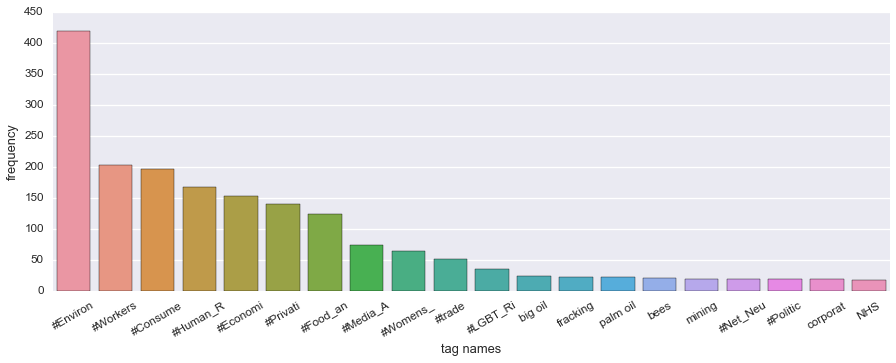

In [4]:
# Finds the top 20 most used tags in the dataset and graphs their frequency
raw_count = pd.DataFrame(raw.groupby('tag_name').size(),columns=['size']).sort_values('size', ascending=False)
raw_count = raw_count.reset_index()
raw_count['label'] = raw_count['tag_name'].str[:8] 
plt.figure(figsize=(15, 5))
sns.set_context("talk", font_scale=.9)
g = sns.barplot(x='label',y='size',data=raw_count[0:20])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set(xlabel='tag names', ylabel='frequency')
plt.show()

#### Now I would like to look at a representation of word frequency within the text itself.  I choose a point in my LDA notebook that is after the data has been cleaned and the stop words applied, but before the words have been stemmed, and export my table.  I can use this set of words to create a word cloud, where the relative size of the word represents its frequency in the selected mailings.

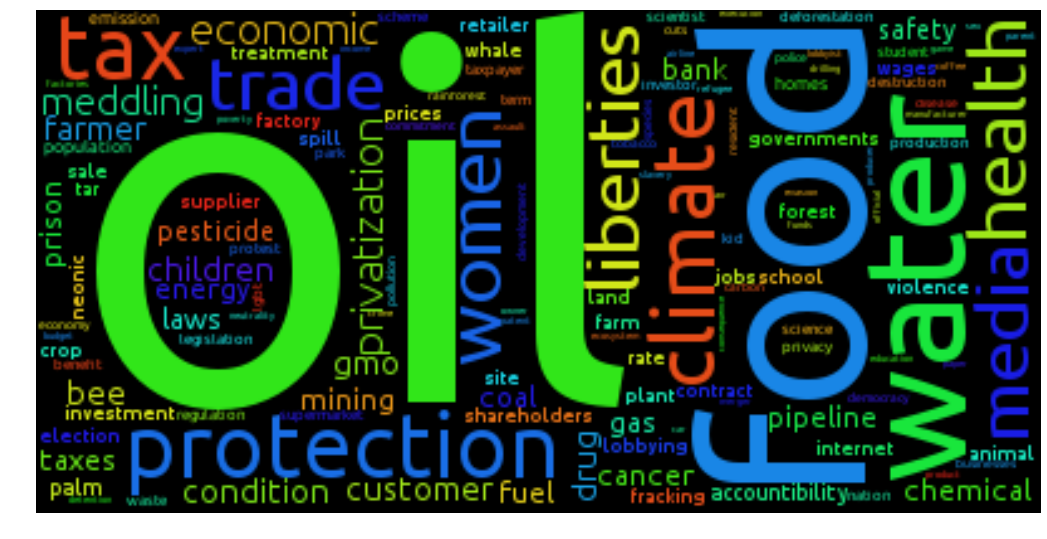

In [10]:
data = pd.read_csv('../capstone/go.csv', encoding = "ISO-8859-1")  #import CSV as a Pandas table
text = str(data['text_go'].sum()).replace("'","") #

font = '/capstone/ubuntu.ttf'

wordcloud = WordCloud(background_color='black',font_path=font,max_words=200).generate(text)

fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(24)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### The most rich and interesting data to explore is the LDA model itself.  Using a 'magic' Jupyter notebook command, I can pull the LDA variables in from my main notebook.  Then I use those variable to generate an interactive visualization.

In [21]:
%store -r lda
%store -r corpus
%store -r dictionary
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

In [155]:
topics = pd.read_csv('../capstone/mailing_topic.csv', index_col=0, encoding = "ISO-8859-1")  #import topics as a Pandas dataframe
topics = topics.drop(['freq','topics'],1) # drop everything except the page_id and the topic % from the LDA
supplemental = pd.read_csv('../capstone/date_size.csv', encoding = "ISO-8859-1") 
joined = pd.merge(supplemental, topics, on='page_id')
topic_list = ['fossil','human','econ','habitat','other','consumer','workers','food']

In [156]:
joined['year'] = pd.to_datetime(joined['mailing_date']).apply(lambda x: x.year) #extract year from mailing_date and store in a new columns
grouped = joined.groupby(['year'])[topic_list].mean() #group by the year aand average the topic distributions within each year
grouped

,fossil,human,econ,habitat,other,consumer,workers,food
year,,,,,,,,
2013,9.526316,16.421053,2.947368,23.368421,9.842105,7.842105,18.315789,10.315789
2014,14.226667,11.840000,9.946667,19.880000,12.293333,11.293333,6.933333,12.186667
2015,13.841270,10.000000,8.269841,26.031746,6.031746,11.190476,7.634921,15.920635
2016,12.368421,20.105263,10.105263,16.947368,4.263158,13.894737,4.000000,17.210526


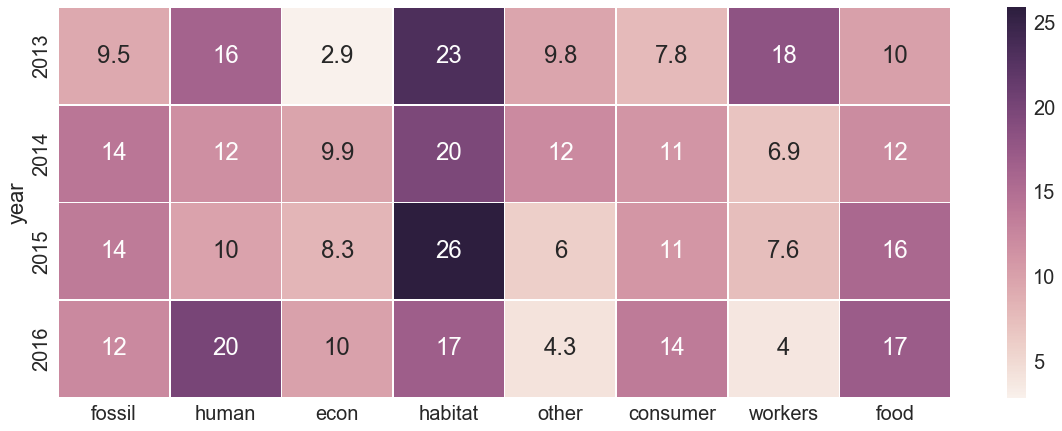

In [169]:
# Draw a heatmap with the numeric values in each cell
sns.heatmap(grouped, annot=True, linewidths=.5)
sns.set(font_scale=2)
#plt.figure(figsize=(25, 15))
plt.rcParams['figure.figsize']=(20,8)
plt.show()